<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.784881,63.121425,72.281135,-0.012656,193.174784,193.180224,-0.005440
1,0.0,1.0,61.876363,96.821973,41.964002,0.012146,210.674483,210.659657,0.014827
2,0.0,2.0,73.261895,26.630607,46.865109,-0.037945,156.719666,156.745823,-0.026157
3,0.0,3.0,74.531621,22.442050,32.145912,0.037847,139.157430,139.103692,0.053737
4,0.0,4.0,48.209026,43.935820,73.197938,-0.012487,175.330297,175.331983,-0.001686
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,33.274955,46.577811,42.991800,0.000344,132.844910,132.851685,-0.006775
19996,999.0,16.0,36.647611,92.356779,33.415651,0.005349,172.425390,172.436087,-0.010697
19997,999.0,17.0,92.972778,44.933858,58.791392,-0.012702,206.685326,206.680713,0.004613
19998,999.0,18.0,84.997084,75.850012,28.226109,-0.016312,199.056892,199.068423,-0.011531


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.784881,63.121425,72.281135,-0.012656,193.174784,193.180224,-0.005440
1,0.0,1.0,61.876363,96.821973,41.964002,0.012146,210.674483,210.659657,0.014827
2,0.0,2.0,73.261895,26.630607,46.865109,-0.037945,156.719666,156.745823,-0.026157
3,0.0,3.0,74.531621,22.442050,32.145912,0.037847,139.157430,139.103692,0.053737
4,0.0,4.0,48.209026,43.935820,73.197938,-0.012487,175.330297,175.331983,-0.001686
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,33.274955,46.577811,42.991800,0.000344,132.844910,132.851685,-0.006775
19996,999.0,16.0,36.647611,92.356779,33.415651,0.005349,172.425390,172.436087,-0.010697
19997,999.0,17.0,92.972778,44.933858,58.791392,-0.012702,206.685326,206.680713,0.004613
19998,999.0,18.0,84.997084,75.850012,28.226109,-0.016312,199.056892,199.068423,-0.011531


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.784881  63.121425  72.281135 -0.012656  193.174784   
      1.0    61.876363  96.821973  41.964002  0.012146  210.674483   
      2.0    73.261895  26.630607  46.865109 -0.037945  156.719666   
      3.0    74.531621  22.442050  32.145912  0.037847  139.157430   
      4.0    48.209026  43.935820  73.197938 -0.012487  175.330297   
...                ...        ...        ...       ...         ...   
999.0 15.0   33.274955  46.577811  42.991800  0.000344  132.844910   
      16.0   36.647611  92.356779  33.415651  0.005349  172.425390   
      17.0   92.972778  44.933858  58.791392 -0.012702  206.685326   
      18.0   84.997084  75.850012  28.226109 -0.016312  199.056892   
      19.0   31.192842  49.205503  30.569650  0.009930  120.977925   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    193.180224 -0.005440  
      1.0    210.659657  0.014827  
      2.0    156.745823 -0.026157  
      3.0    139.103692  0.053737  
      4.0    175.331983 -0.001686  
...                 ...       ...  
999.0 15.0   132.851685 -0.006775  
      16.0   172.436087 -0.010697  
      17.0   206.680713  0.004613  
      18.0   199.068423 -0.011531  
      19.0   120.977792  0.000134  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.784881  63.121425  72.281135 -0.012656  193.174784   
      1.0    61.876363  96.821973  41.964002  0.012146  210.674483   
      2.0    73.261895  26.630607  46.865109 -0.037945  156.719666   
      3.0    74.531621  22.442050  32.145912  0.037847  139.157430   
      4.0    48.209026  43.935820  73.197938 -0.012487  175.330297   
...                ...        ...        ...       ...         ...   
999.0 15.0   33.274955  46.577811  42.991800  0.000344  132.844910   
      16.0   36.647611  92.356779  33.415651  0.005349  172.425390   
      17.0   92.972778  44.933858  58.791392 -0.012702  206.685326   
      18.0   84.997084  75.850012  28.226109 -0.016312  199.056892   
      19.0   31.192842  49.205503  30.569650  0.009930  120.977925   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    193.180224 -0.005440  
      1.0    210.659657  0.014827  
      2.0    156.745823 -0.026157  
      3.0    139.103692  0.053737  
      4.0    175.331983 -0.001686  
...                 ...       ...  
999.0 15.0   132.851685 -0.006775  
      16.0   172.436087 -0.010697  
      17.0   206.680713  0.004613  
      18.0   199.068423 -0.011531  
      19.0   120.977792  0.000134  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.784881,63.121425,72.281135,-0.012656,193.174784,193.180224,-0.005440
1,0.0,1.0,61.876363,96.821973,41.964002,0.012146,210.674483,210.659657,0.014827
2,0.0,2.0,73.261895,26.630607,46.865109,-0.037945,156.719666,156.745823,-0.026157
3,0.0,3.0,74.531621,22.442050,32.145912,0.037847,139.157430,139.103692,0.053737
4,0.0,4.0,48.209026,43.935820,73.197938,-0.012487,175.330297,175.331983,-0.001686
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,33.274955,46.577811,42.991800,0.000344,132.844910,132.851685,-0.006775
19996,999.0,16.0,36.647611,92.356779,33.415651,0.005349,172.425390,172.436087,-0.010697
19997,999.0,17.0,92.972778,44.933858,58.791392,-0.012702,206.685326,206.680713,0.004613
19998,999.0,18.0,84.997084,75.850012,28.226109,-0.016312,199.056892,199.068423,-0.011531


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.784881  63.121425  72.281135 -0.012656  193.174784   
      1.0    61.876363  96.821973  41.964002  0.012146  210.674483   
      2.0    73.261895  26.630607  46.865109 -0.037945  156.719666   
      3.0    74.531621  22.442050  32.145912  0.037847  139.157430   
      4.0    48.209026  43.935820  73.197938 -0.012487  175.330297   
...                ...        ...        ...       ...         ...   
999.0 15.0   33.274955  46.577811  42.991800  0.000344  132.844910   
      16.0   36.647611  92.356779  33.415651  0.005349  172.425390   
      17.0   92.972778  44.933858  58.791392 -0.012702  206.685326   
      18.0   84.997084  75.850012  28.226109 -0.016312  199.056892   
      19.0   31.192842  49.205503  30.569650  0.009930  120.977925   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    193.180224 -0.005440  
      1.0    210.659657  0.014827  
      2.0    156.745823 -0.026157  
      3.0    139.103692  0.053737  
      4.0    175.331983 -0.001686  
...                 ...       ...  
999.0 15.0   132.851685 -0.006775  
      16.0   172.436087 -0.010697  
      17.0   206.680713  0.004613  
      18.0   199.068423 -0.011531  
      19.0   120.977792  0.000134  

[20000 rows x 7 columns]

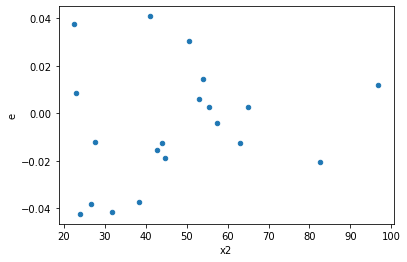

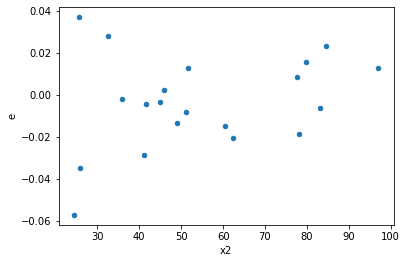

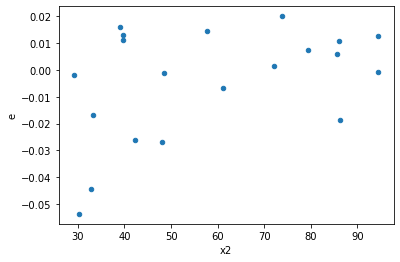

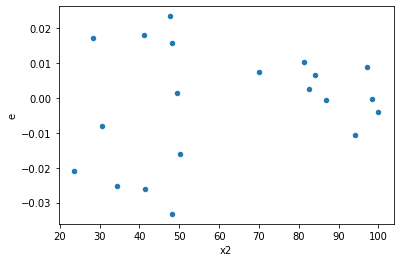

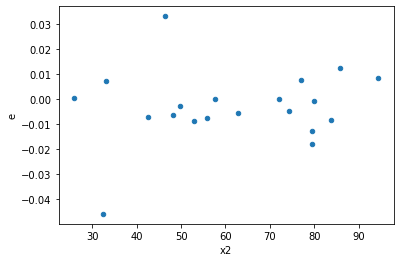

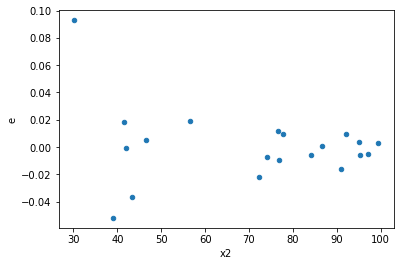

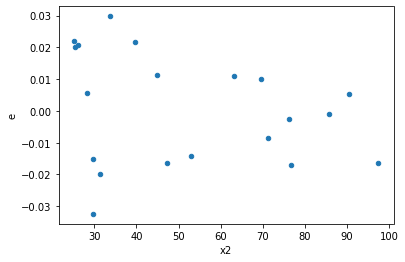

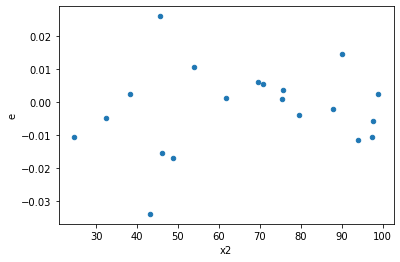

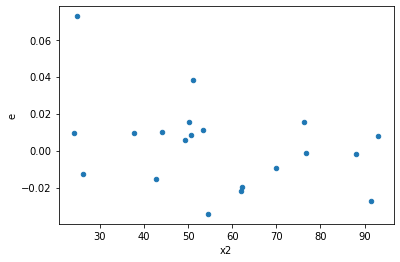

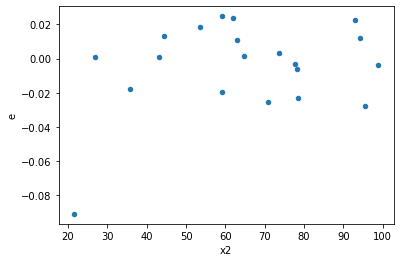

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
12.0,5.0,5.0,0.0021909379565261543,0.003062380991823397,0.00043818759130523084,0.0006124761983646793,1.397748842089057,0.7222447210678644,0.6388776394660678,0.3611223605339322,Reject005=1 : Homoscedasticity
13.0,5.0,5.0,0.0004185257522251236,0.0006690719994227034,8.370515044502472e-05,0.00013381439988454069,1.5986399782224436,0.6192114380803218,0.6903942809598391,0.3096057190401609,Reject005=1 : Homoscedasticity
14.0,5.0,5.0,0.0010518377259350214,0.0024102271211363224,0.00021036754518700428,0.0004820454242272645,2.291443881225855,0.38396823186023354,0.8080158840698832,0.19198411593011677,Reject005=1 : Homoscedasticity
16.0,5.0,5.0,0.0003121427201337921,0.004994356780706509,6.242854402675842e-05,0.000998871356141302,16.000234695737273,0.00854981206723382,0.9957250939663831,0.00427490603361691,Reject005=0 : Heteroscedasticity
18.0,5.0,5.0,0.00042491639053366764,0.0012749485197396167,8.498327810673353e-05,0.00025498970394792334,3.00046914673817,0.2531053429366643,0.8734473285316678,0.12655267146833216,Reject005=1 : Homoscedasticity
20.0,5.0,5.0,0.001247529307066047,0.0015926717640302194,0.0002495058614132094,0.0003185343528060439,1.2766608006796107,0.7952203642202387,0.6023898178898807,0.39761018211011934,Reject005=1 : Homoscedasticity
21.0,5.0,5.0,0.001128348591260776,0.0018927587098404959,0.0002256697182521552,0.0003785517419680992,1.6774591863721793,0.5840713784479994,0.7079643107760003,0.2920356892239997,Reject005=1 : Homoscedasticity
22.0,5.0,5.0,0.0008133273913867765,0.0011387106160207245,0.0001626654782773553,0.0002277421232041449,1.4000642645013448,0.7209348891088214,0.6395325554455893,0.3604674445544107,Reject005=1 : Homoscedasticity
31.0,5.0,5.0,0.0014606055024293106,0.001564649075454432,0.00029212110048586215,0.00031292981509088637,1.0712331788782623,0.941649401194196,0.529175299402902,0.470824700597098,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.0052723975592488615,0.0024193995756037895,0.0010544795118497723,0.0004838799151207579,0.4588803382930919,0.41272223700795097,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,0.0012163852605141746,0.0005631534234643537,0.00024327705210283493,0.00011263068469287074,0.4629729097722746,0.4179494399667409,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,0.003575040341214921,0.00021735133628272477,0.0007150080682429842,4.3470267256544954e-05,0.0607968905349083,0.008025061479973233,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,0.0010159482430783953,0.0005086200117244286,0.00020318964861567907,0.00010172400234488572,0.500635751072588,0.4658265502838025,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,0.0016564888074736513,0.0001979418959939153,0.00033129776149473027,3.958837919878306e-05,0.11949485870405667,0.035915479076339456,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,0.01041877779204438,0.0005184028507564738,0.002083755558408876,0.00010368057015129476,0.049756589602315764,0.005046780929188801,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,0.0026423252604145923,0.0017729507974631057,0.0005284650520829185,0.00035459015949262116,0.6709812845618113,0.6721716422774475,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,0.0009644132355323533,0.0001858646234900056,0.00019288264710647066,3.717292469800112e-05,0.19272301192279767,0.09492217279370654,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,0.0024812524766464066,0.0011877512020783021,0.0004962504953292813,0.00023755024041566042,0.47869018298518107,0.4379853916796952,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      776
Reject005=0 : Heteroscedasticity    224
Name: Result_test, dtype: int64